# Import Libraries

In [ ]:
from __future__ import print_function
import torch.optim as optim
from torchvision import datasets, transforms
import torch
import torch.nn.functional as F
import torchvision
from torchsummary import summary
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
#!pip install -U albumentations
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Import files from GIT Hub

In [ ]:
!git clone https://github.com/JaiBhagat/ERA1_main_repo-main.git

Cloning into 'ERA1_main_repo'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 47 (delta 13), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (47/47), 18.58 KiB | 613.00 KiB/s, done.
Resolving deltas: 100% (13/13), done.


# ResNet18 class is imported

In [ ]:
from ERA1_main_repo.models import resnet
from ERA1_main_repo.models.resnet import ResNet18

# Import Other fuctions

In [ ]:
from ERA1_main_repo import main, utils
from ERA1_main_repo.utils import *
from ERA1_main_repo.main import train, test, train_test_model

# Assign device

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [ ]:
view_model = ResNet18().to(device)
summary(view_model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

# Show sample images and Load dataset

100%|██████████| 170498071/170498071 [00:03<00:00, 42869057.57it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


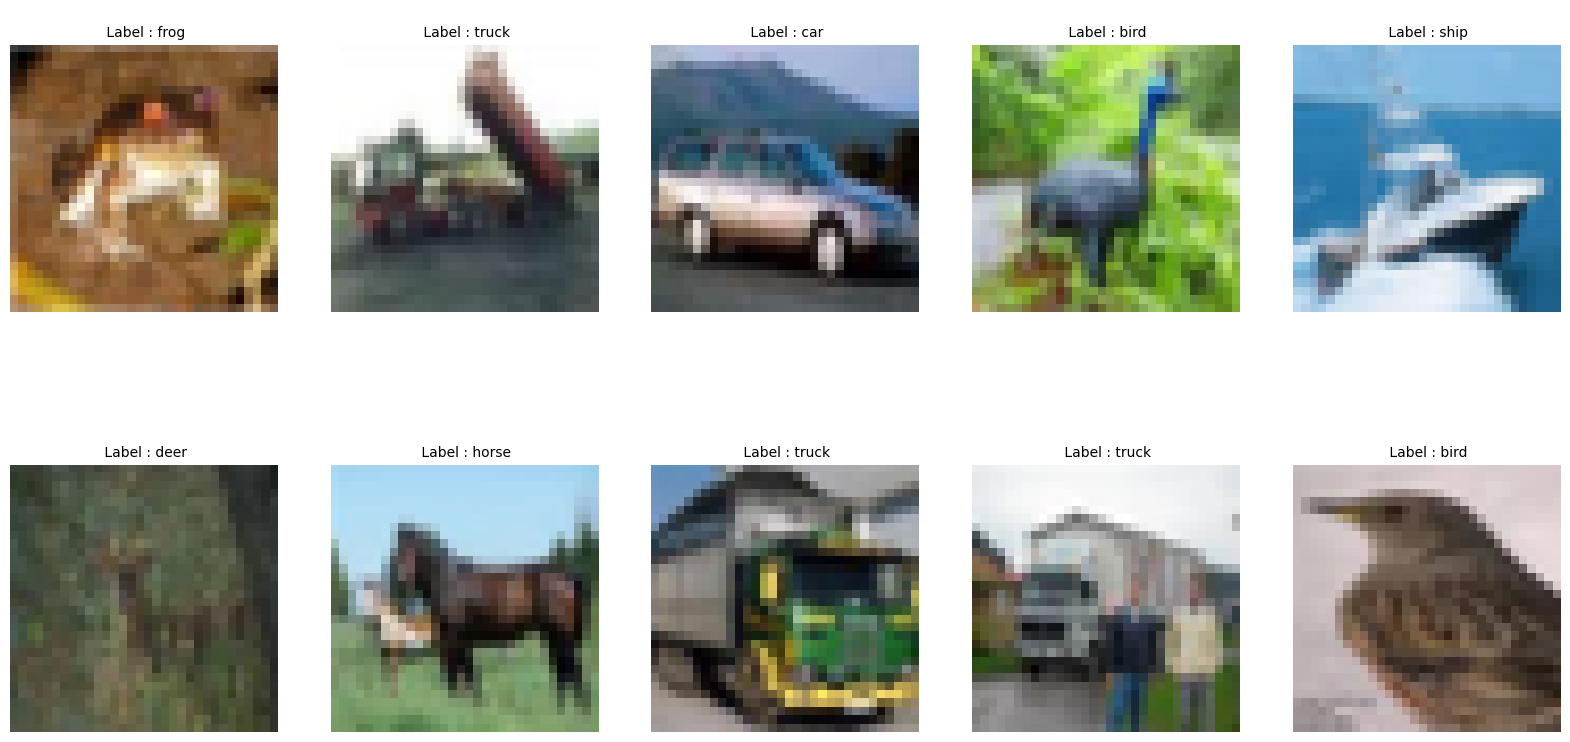

In [ ]:
model = ResNet18().to(device)
trainset_mod, trainloader_mod, testset_mod, testloader_mod = process_dataset()

In [ ]:
#!pip install -U albumentations
!pip install torch_lr_finder
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch_lr_finder import LRFinder

/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/200 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 3.18E-03


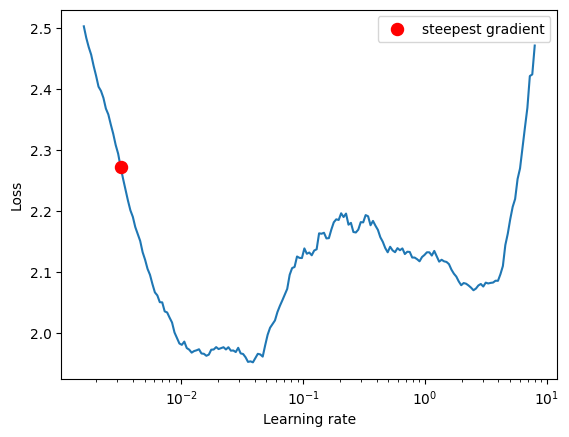

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(model, optimizer, criterion, device=device)
lr_finder.range_test(trainloader_mod, end_lr=10, num_iter=200,step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

# Train & Test Model

In [ ]:
model_tr, wrong_prediction_list, train_losses, train_acc, test_losses, test_acc = train_test_model(model, trainloader_mod, testloader_mod, norm_type='BN', EPOCHS=20, lr=3.18E-03, device=device,sched='OneCycle',optim='SGD')

EPOCH: 1


100%|██████████| 391/391 [00:43<00:00,  8.95it/s]


Average Training Loss=0.013505619020462037, Accuracy=36.124


Test set: Average loss: 0.0107, Accuracy: 5039/10000 (50.39%)

EPOCH: 2


100%|██████████| 391/391 [00:44<00:00,  8.84it/s]


Average Training Loss=0.010357338083982467, Accuracy=51.68


Test set: Average loss: 0.0089, Accuracy: 5897/10000 (58.97%)

EPOCH: 3


100%|██████████| 391/391 [00:44<00:00,  8.85it/s]


Average Training Loss=0.008632681008577347, Accuracy=60.404


Test set: Average loss: 0.0076, Accuracy: 6564/10000 (65.64%)

EPOCH: 4


100%|██████████| 391/391 [00:43<00:00,  8.92it/s]


Average Training Loss=0.007290389587879181, Accuracy=66.656


Test set: Average loss: 0.0074, Accuracy: 6764/10000 (67.64%)

EPOCH: 5


100%|██████████| 391/391 [00:44<00:00,  8.86it/s]


Average Training Loss=0.006485231999158859, Accuracy=70.634


Test set: Average loss: 0.0059, Accuracy: 7391/10000 (73.91%)

EPOCH: 6


100%|██████████| 391/391 [00:44<00:00,  8.77it/s]


Average Training Loss=0.005787150619626045, Accuracy=73.912


Test set: Average loss: 0.0055, Accuracy: 7552/10000 (75.52%)

EPOCH: 7


100%|██████████| 391/391 [00:44<00:00,  8.88it/s]


Average Training Loss=0.005279707170724869, Accuracy=76.088


Test set: Average loss: 0.0051, Accuracy: 7723/10000 (77.23%)

EPOCH: 8


100%|██████████| 391/391 [00:44<00:00,  8.88it/s]


Average Training Loss=0.004874882072210312, Accuracy=78.122


Test set: Average loss: 0.0046, Accuracy: 8030/10000 (80.30%)

EPOCH: 9


100%|██████████| 391/391 [00:44<00:00,  8.86it/s]


Average Training Loss=0.00454889329969883, Accuracy=79.492


Test set: Average loss: 0.0043, Accuracy: 8139/10000 (81.39%)

EPOCH: 10


100%|██████████| 391/391 [00:43<00:00,  8.90it/s]


Average Training Loss=0.004274184250831604, Accuracy=80.986


Test set: Average loss: 0.0042, Accuracy: 8212/10000 (82.12%)

EPOCH: 11


100%|██████████| 391/391 [00:43<00:00,  8.93it/s]


Average Training Loss=0.004003092588782311, Accuracy=81.934


Test set: Average loss: 0.0036, Accuracy: 8399/10000 (83.99%)

EPOCH: 12


100%|██████████| 391/391 [00:44<00:00,  8.86it/s]


Average Training Loss=0.0037688891196250916, Accuracy=83.026


Test set: Average loss: 0.0039, Accuracy: 8339/10000 (83.39%)

EPOCH: 13


100%|██████████| 391/391 [00:44<00:00,  8.89it/s]


Average Training Loss=0.0034997071316838265, Accuracy=84.32


Test set: Average loss: 0.0033, Accuracy: 8577/10000 (85.77%)

EPOCH: 14


100%|██████████| 391/391 [00:43<00:00,  8.90it/s]


Average Training Loss=0.003352737662792206, Accuracy=84.916


Test set: Average loss: 0.0033, Accuracy: 8610/10000 (86.10%)

EPOCH: 15


100%|██████████| 391/391 [00:43<00:00,  8.91it/s]


Average Training Loss=0.0030758035150170327, Accuracy=86.044


Test set: Average loss: 0.0031, Accuracy: 8689/10000 (86.89%)

EPOCH: 16


100%|██████████| 391/391 [00:44<00:00,  8.88it/s]


Average Training Loss=0.0028847662875056265, Accuracy=87.182


Test set: Average loss: 0.0030, Accuracy: 8718/10000 (87.18%)

EPOCH: 17


100%|██████████| 391/391 [00:43<00:00,  8.91it/s]


Average Training Loss=0.0026243738850951193, Accuracy=88.172


Test set: Average loss: 0.0028, Accuracy: 8815/10000 (88.15%)

EPOCH: 18


100%|██████████| 391/391 [00:43<00:00,  8.94it/s]


Average Training Loss=0.0024476546636223793, Accuracy=89.174


Test set: Average loss: 0.0026, Accuracy: 8902/10000 (89.02%)

EPOCH: 19


100%|██████████| 391/391 [00:44<00:00,  8.88it/s]


Average Training Loss=0.0022718831753730773, Accuracy=89.992


Test set: Average loss: 0.0026, Accuracy: 8891/10000 (88.91%)

EPOCH: 20


100%|██████████| 391/391 [00:43<00:00,  8.91it/s]


Average Training Loss=0.0022382780779898167, Accuracy=90.026


Test set: Average loss: 0.0025, Accuracy: 8905/10000 (89.05%)

Total Number of incorrectly predicted images by model type BN is 1095


# Display Validation Accuracy & Loss

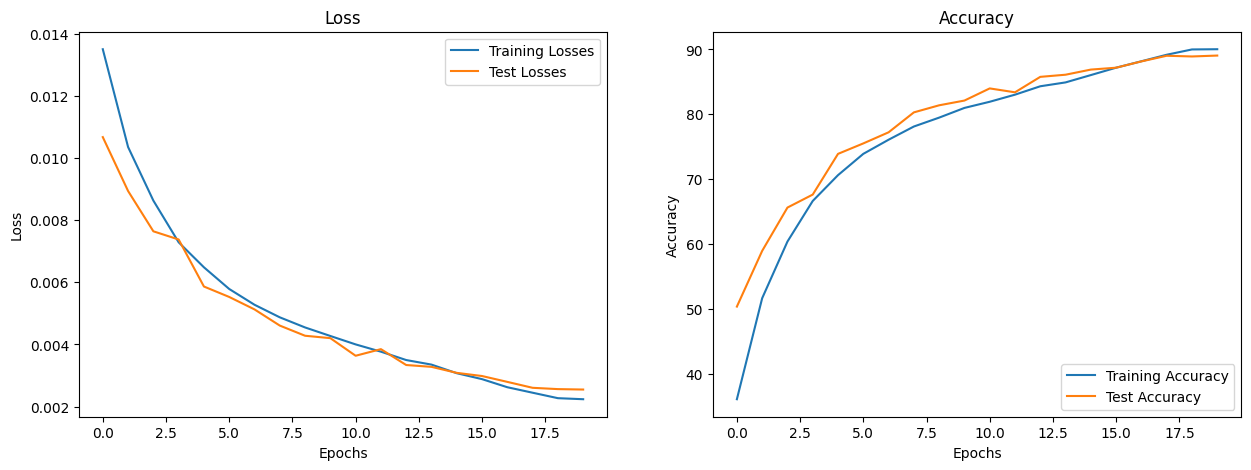

In [ ]:
plot_acc_loss(train_acc,train_losses,test_acc,test_losses)

# Display wrong prediction

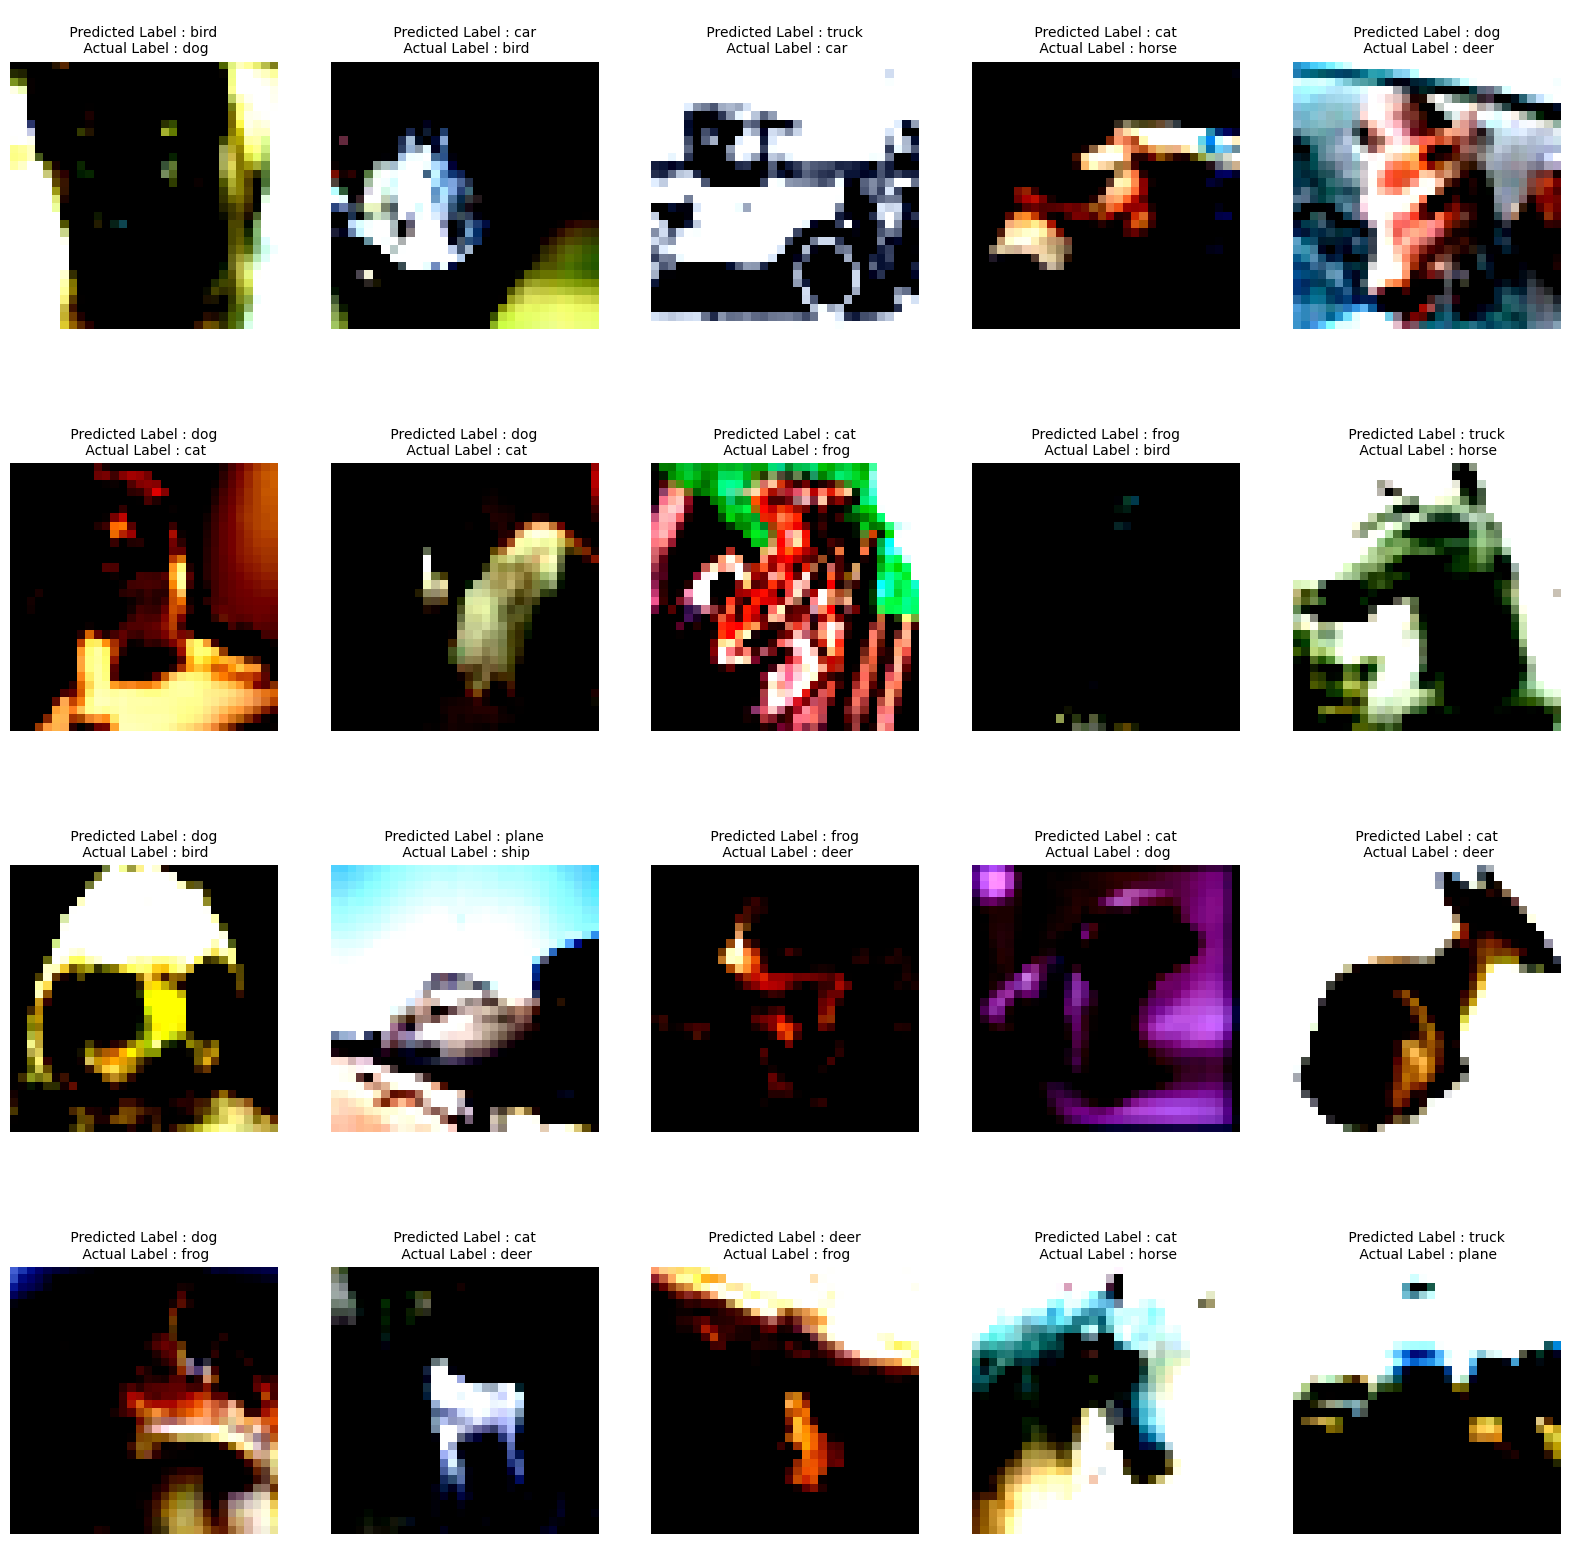

In [ ]:
display_incorrect_pred(wrong_prediction_list)

# GradCam

In [ ]:
target_layers = ["layer1", "layer2","layer3", "layer4"]
torch.autograd.set_detect_anomaly(True)

In [ ]:
from ERA1_main_repo.utils import generate_gradcam, plot_gradcam
gradcam_output, probs, predicted_classes = generate_gradcam(wrong_prediction_list[:10], model_tr, target_layers, device)

torch.Size([10, 10])
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3
Generating Grad-CAM @layer4


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1344: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


Files already downloaded and verified
Files already downloaded and verified


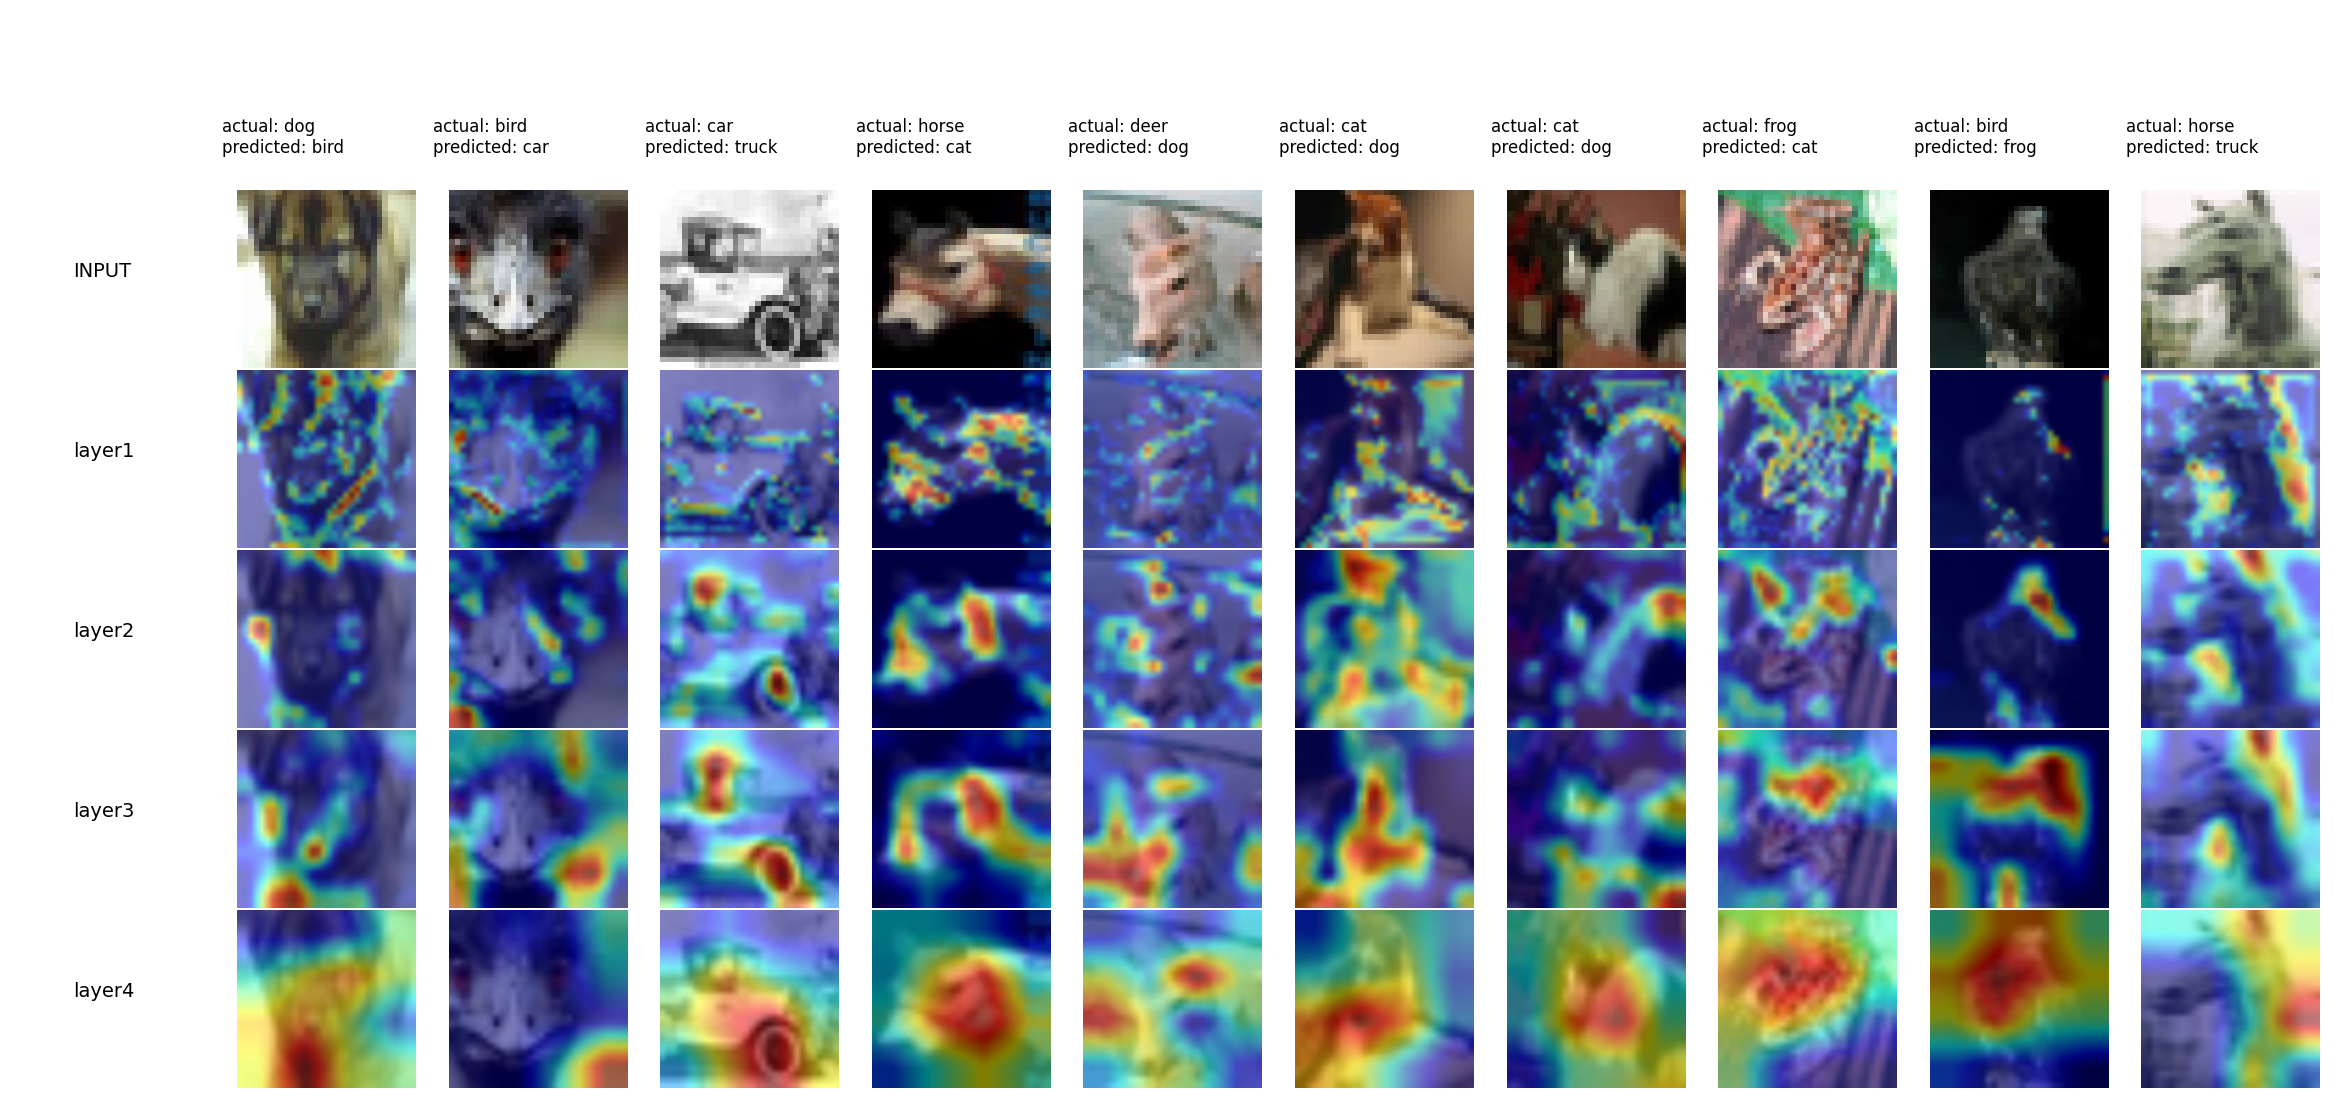

In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
plot_gradcam(gradcam_output, target_layers, classes, (3,32,32), predicted_classes, wrong_prediction_list[:10])

Files already downloaded and verified
Files already downloaded and verified


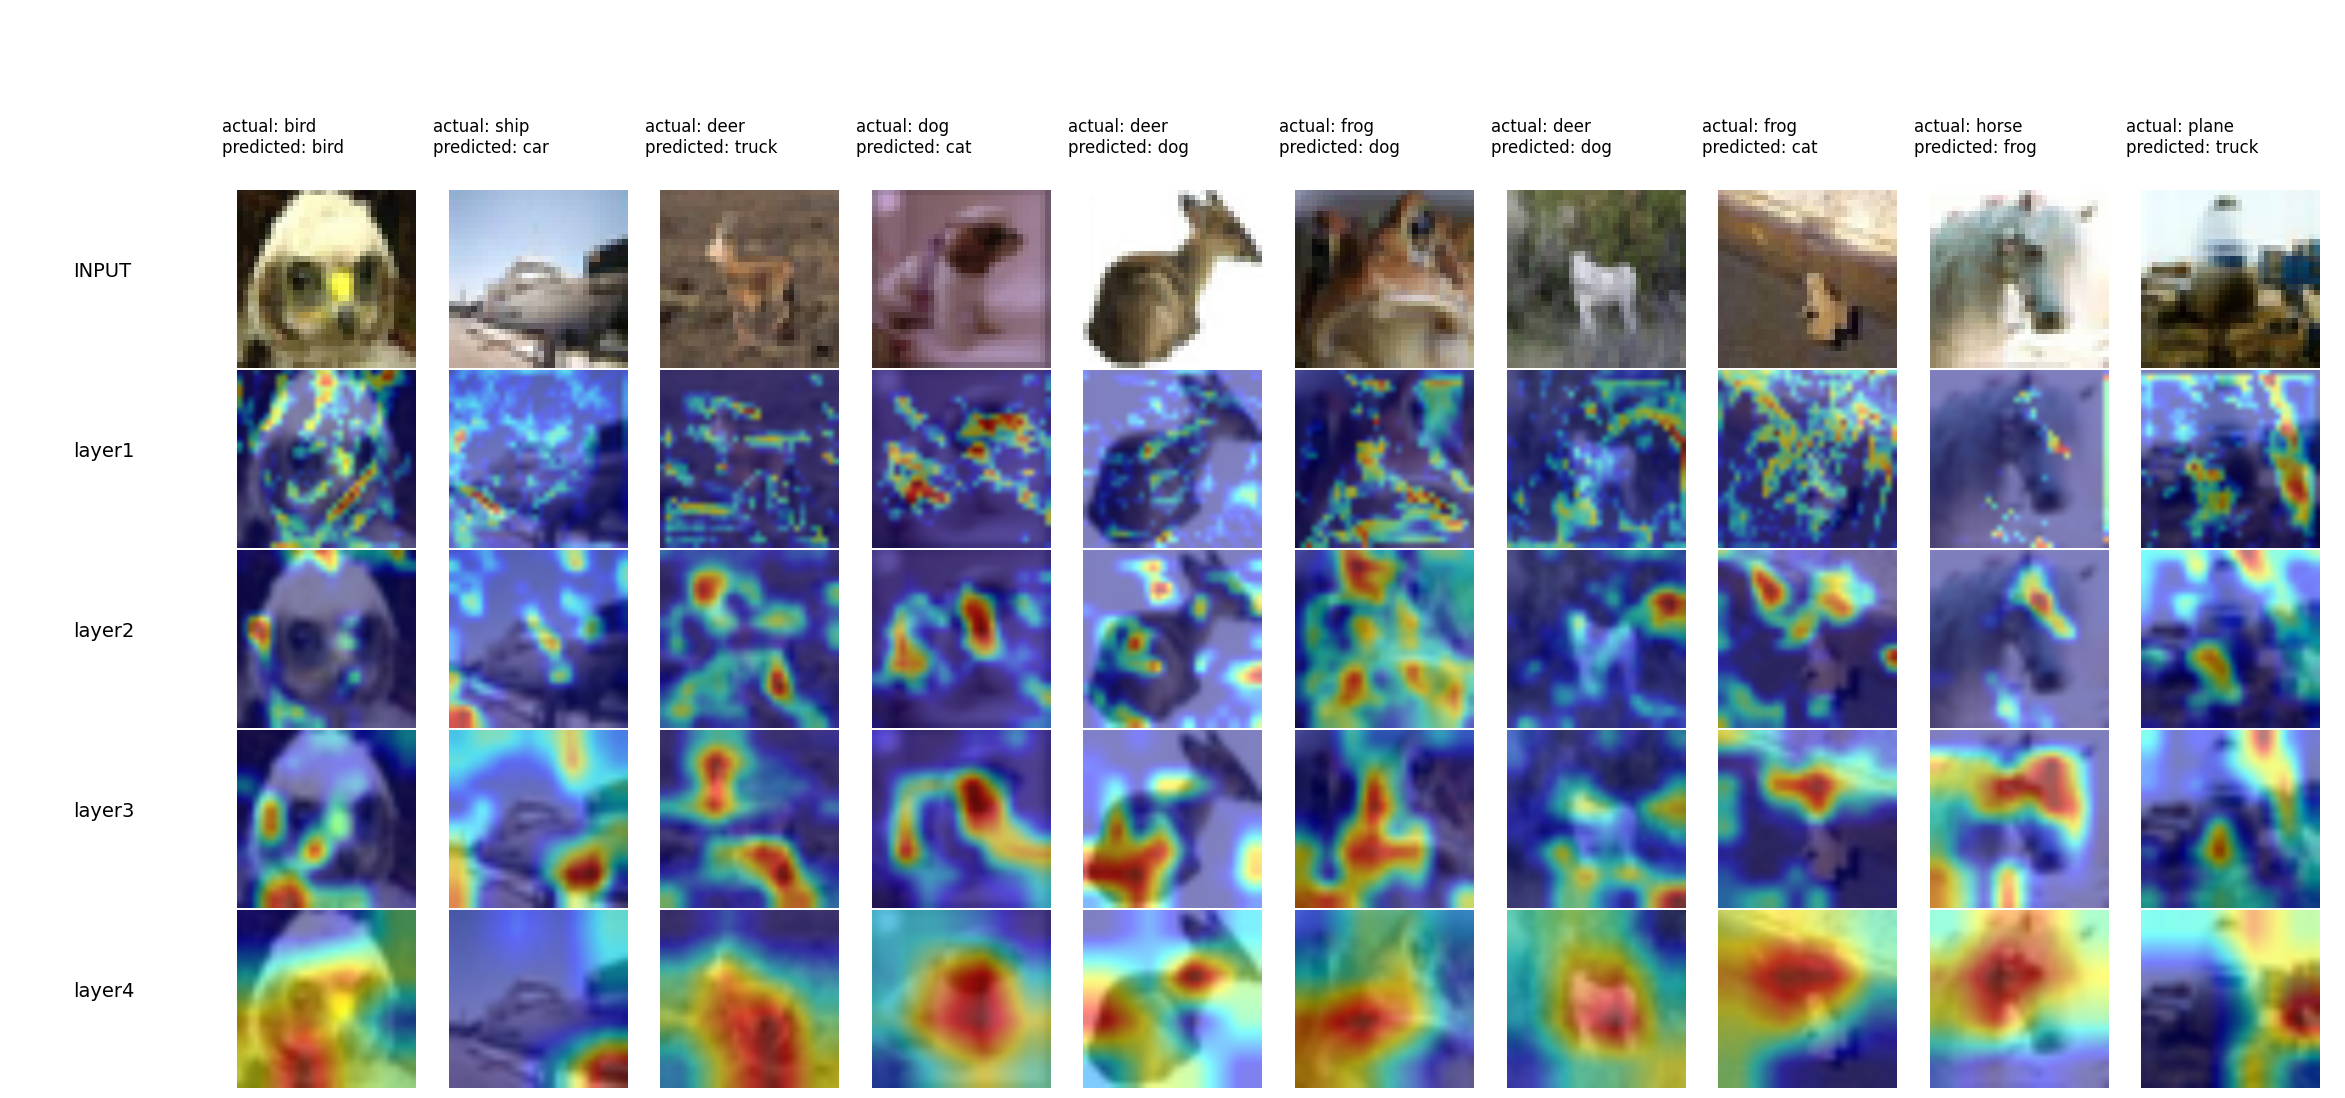

In [ ]:
plot_gradcam(gradcam_output, target_layers, classes, (3,32,32), predicted_classes, wrong_prediction_list[10:20])